<a href="https://colab.research.google.com/github/Sagaust/DH-Computational-Methodologies/blob/main/Tossing_a_coin_Augustine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Toss a coin

Tossing coins is a good way for us to understand the idea of random experiments tending towards their expected mean - and how to tell when they are not (an unfair coin).

Your first task is to toss a coin! There are a bunch of ways you could do that in Python, so we'll let you figure this one out. We'll give you two hints:

- The function has to come from the **numpy** library
- You need to be able to adjust the number of outcomes (for example, you should be able to use it to roll a dice too)

How will you go about this?

In [ ]:
# Toss a coin here
np.random.randint(0, 2, dtype=int)

0

## Discrete variables

You just tossed your first digital coin!

Being able to simulate a coin toss might seem trivial, but it is in fact a very useful example. Anything we observe and record in life can be seen as **a random experiment**, or a coin toss.

Some of them will be just like the coin toss - with **a binary outcome**:

- Customers converting to the premium subscription (they either convert or they don't)
- Customers churning

Others will have **more than two outcomes**, but they will all still be clearly defined:

- The color of a product that your customers choose
- What type of delivery service customers choose at checkout

We call this type of variables discrete - the **sample space** (or the possible outcomes) of the experiment are **categorical and clearly defined**.

Try to think of some more examples and counter examples to practice your understanding of **discrete variables**.

## Tossing more than one coin

Well done on your first coin toss. Now, use the same function to toss **the same fair coin 10 times**. How many times do you expect to get heads?

In [ ]:
# Toss the same coin 10 times
tosses = np.random.randint(0, 2, size=10, dtype=int)
tosses

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
# Count heads (zeros)
np.sum(tosses == 0)

8

If the result of your coin tosses was 5 heads, congrats! Your experiment matched your **expectations**!
If not, you just experienced the difference between observed and **expected results**.

Dreaded terminology alert (watch StatsQuest to get that reference):

- The **expected value** is the theoretical outcome of an experiment. Let's stick with coin tosses - if I toss a coin 10 times, I **expect** to get 5 heads. Whether or not I will get 5 heads every time I toss a coin 10 times is a matter of chance, but I **expect** to get 5 heads.

Toss 10 coins 10 times each now, to see if over many tosses, your results get closer to the **expected value** of 5 heads for every 10 tosses. You need to look for a different function!

In [ ]:
# Toss 10 coins 10 times each
np.random.binomial(n = 10, p = 0.5, size = 10)

array([3, 5, 6, 7, 5, 4, 7, 5, 5, 6])

**Hint**: check the [np.random.binomial](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html) documentation.

**More!** Toss 100 coins 10 times each!

In [ ]:
# Toss 100 coins 10 times each
np.random.binomial(n = 10, p = 0.5, size = 100)

array([5, 8, 6, 6, 1, 4, 7, 7, 9, 7, 4, 6, 6, 6, 5, 4, 6, 6, 7, 4, 4, 5,
       6, 6, 3, 4, 7, 7, 4, 3, 2, 6, 4, 6, 2, 5, 5, 5, 5, 3, 4, 4, 6, 5,
       4, 6, 5, 5, 7, 5, 3, 4, 6, 6, 5, 5, 6, 4, 7, 4, 2, 4, 5, 5, 7, 5,
       4, 8, 3, 4, 4, 4, 5, 5, 5, 5, 4, 4, 6, 6, 6, 2, 5, 5, 3, 5, 5, 2,
       8, 5, 7, 5, 6, 3, 5, 3, 5, 7, 5, 6])

Nice! Are your results getting closer to the **expected value**?

It's a bit hard to tell right? What if we looked at the **mean number of heads per 10 tosses over 100 trials**?

In [ ]:
# Calculate the mean number of heads after tossing 100 coins 10 times each
np.mean(np.random.binomial(n = 10, p = 0.5, size = 100))

5.2

What about **10 tosses over 1000 trials**?

In [ ]:
# Calculate the mean number of heads after tossing 100 coins 10 times each
np.mean(np.random.binomial(n = 10, p = 0.5, size = 1000))

5.085

## The Law of Large Numbers

Big **eureka** moment right here! You just experienced the **Law of Large Numbers**. Oh, what the ancient mathematicians would have given to be able to do random experiments so quickly and so efficiently!

What does the **Law of Large Numbers** tell us?

Simply and intuitively - as you increase the number of **trials** (the number of coins you toss), the mean observed value will get closer and closer to the **expected value**.

## We need visual confirmation

Assign the number of trials, the expected value and the fairness of the coin to variables to make it easier to play with them.

In [ ]:
number_of_trials = 1000
exp = 5
proba = 0.5

Now run your coin toss experiment (10 tosses) for every whole number from 1 to the `number_of_trials` variable you have just defined. Store your results in a list.

**Hint**: check the [np.arrange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) documentation

In [ ]:
trials = np.arange(1,number_of_trials + 1,1)
results = [np.mean(np.random.binomial(n = 10, p = proba, size = n)) for n in trials]

It's time to reactivate your plotting muscles.

On the same line graph, plot the following:

- The average number of heads per 10 tosses as you increase the number of trials (in blue)
- The expected number of heads per 10 tosses (in red) - this should be a horizontal line

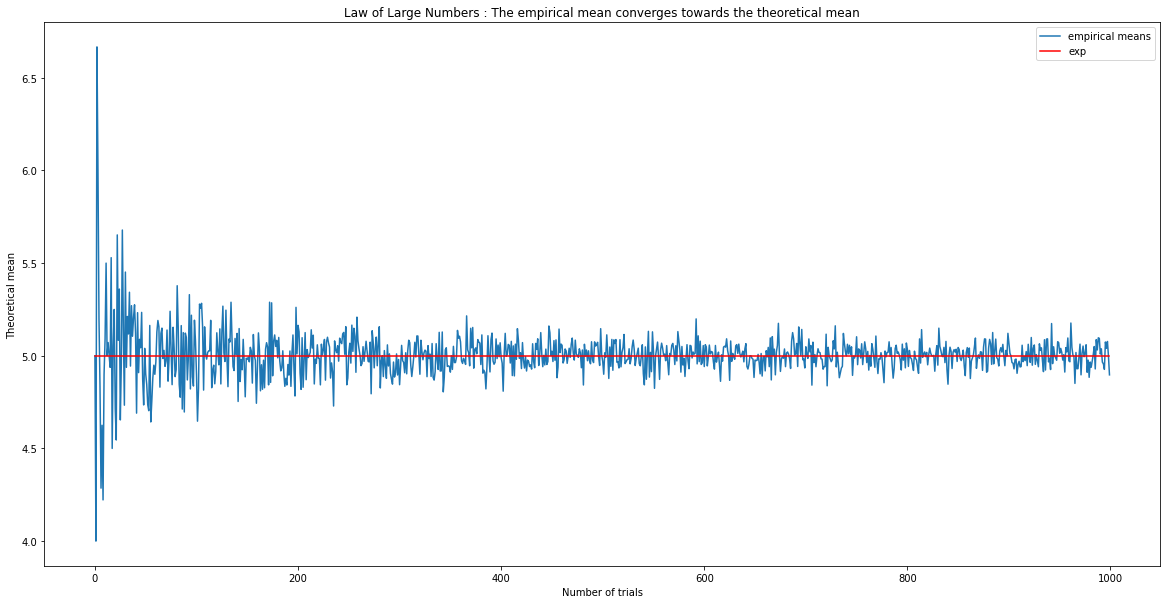

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(results,label='empirical means')
plt.plot([exp]*len(results),label='exp', color = "red")

plt.title('Law of Large Numbers : The empirical mean converges towards the theoretical mean over time')
plt.xlabel('Number of trials')
plt.ylabel('Theoretical mean')

plt.legend(loc='best')
plt.show()

If you did this right, you should be able to see how as you increase the number of trials, the observed (empirical) means mirror the expected (theoretical) mean more and more.

Let's now wrap it in one function so we can reuse it in our later code if we need to. Create a fuction `def toss_10_coins` that takes 3 arguments. This function should refactor all the steps from creating `trials`, `results` and your plot.

In [ ]:
def toss_10_coins(number_of_trials, exp, proba):
    trials = np.arange(1,number_of_trials + 1,1)
    results = [np.mean(np.random.binomial(n = 10, p = proba, size = n)) for n in trials]

    plt.figure(figsize=(20,10))

    plt.plot(results,label='empirical means')
    plt.plot([exp]*len(results),label='exp', color = "red")

    plt.title('Law of Large Numbers : The empirical mean converges towards the theoretical mean')
    plt.xlabel('Number of trials')
    plt.ylabel('Theoretical mean')

    plt.legend(loc='best')
    plt.show()

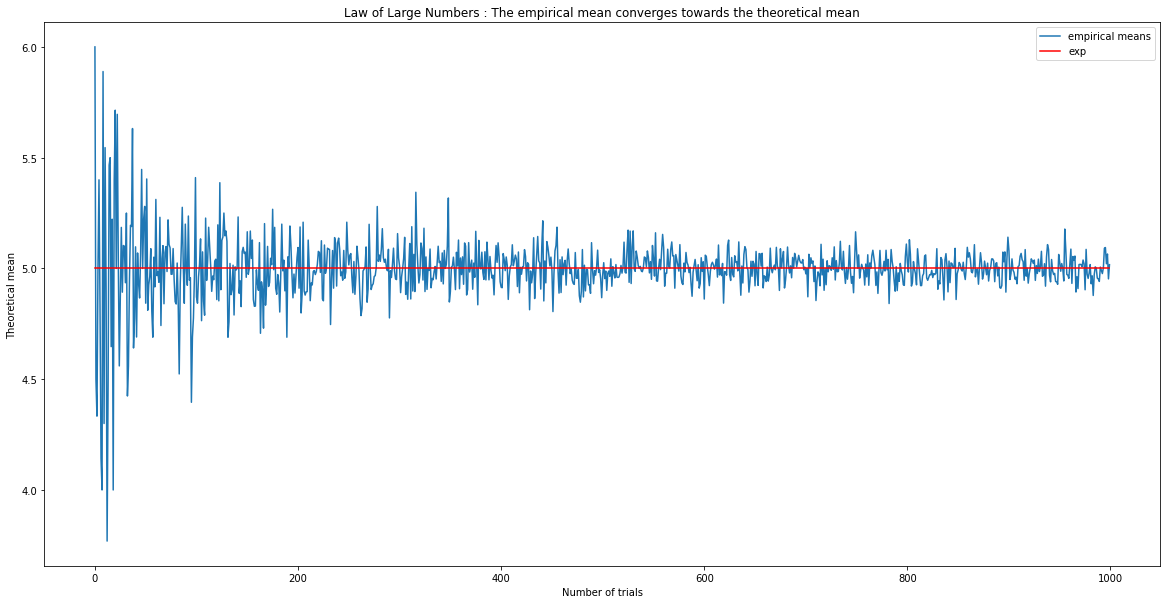

In [ ]:
toss_10_coins(1000, 5, 0.5)

## Let's make it unfair

Until now, every experiment has been done with a fair coin. However, the random experiments of life are rarely fair and we do not usually know their expected value.

Run your function with a probability of 0.51, while keeping the expected value at 5. At what point can you tell that the coin is ever so slightly unbalanced?

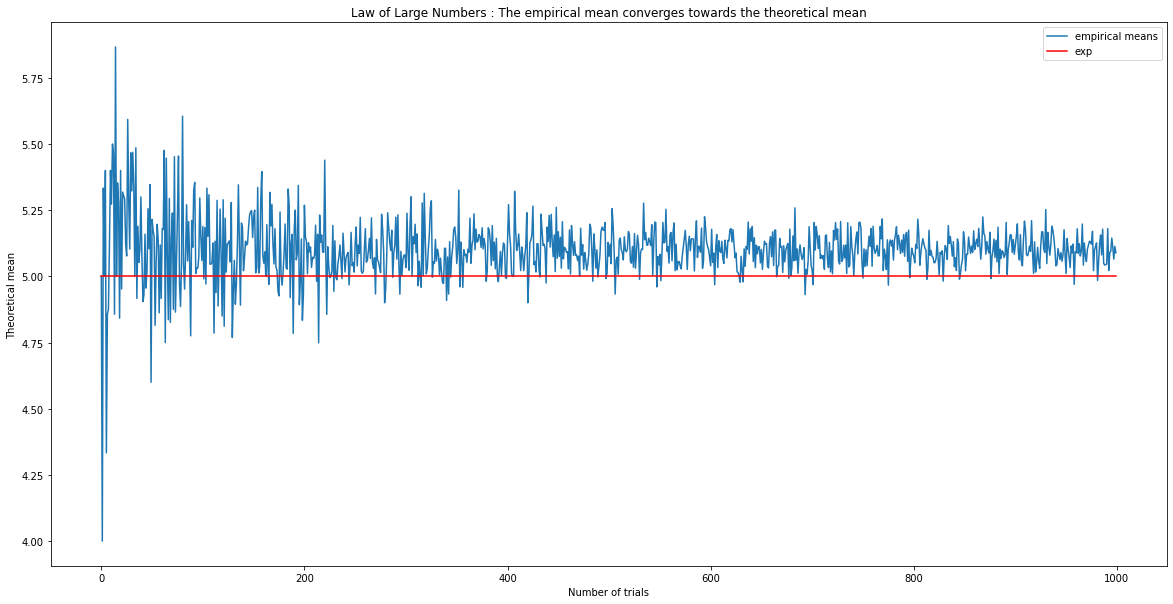

In [ ]:
toss_10_coins(1000, 5, 0.51)

## Learnings

We saw how an experiment will tend to it's theoretical, expected value as we increase the number of trials. This will prove very useful later, when we look at real life scenarios and AB testing and we understand that having more data will allow us to draw sounder conclusions.